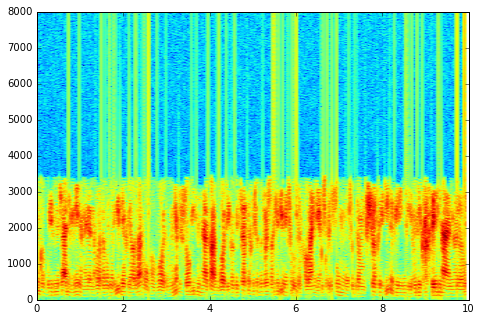

In [47]:
import numpy
import scipy.io.wavfile
from collections import defaultdict
from matplotlib import pyplot, mlab
%matplotlib inline
from math import cos, pi

WINDOW_SIZE = 2048 # размер окна, в котором делается fft
WINDOW_STEP = 512 # шаг окна

def get_wave_data(wave_filename):
    sample_rate, wave_data = scipy.io.wavfile.read(wave_filename)
    SAMPLE_RATE = sample_rate
    assert sample_rate == SAMPLE_RATE, sample_rate
    if isinstance(wave_data[0], numpy.ndarray): # стерео
        wave_data = wave_data.mean(1)
    return wave_data

def get_filtered_data(wave_data):
    filtered_wave_data = [0]
    for t in range(1, len(wave_data)):
        filtered_wave_data.append((wave_data[t]-0.9*wave_data[t-1])*(0.54-0.46*cos((t-6)*pi/90)))
    return filtered_wave_data

def show_specgram(wave_data):
    fig = pyplot.figure()
    ax = fig.add_axes((0.1, 0.1, 1, 1))
    ax.specgram(wave_data,
        NFFT=WINDOW_SIZE, noverlap=WINDOW_SIZE - WINDOW_STEP, Fs=SAMPLE_RATE)
    pyplot.show()
    

wave_data = get_wave_data('/Users/kseniadrozdova/Desktop/test.wav')
filtered_data = get_filtered_data(wave_data)
show_specgram(filtered_data)

/Users/kseniadrozdova/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


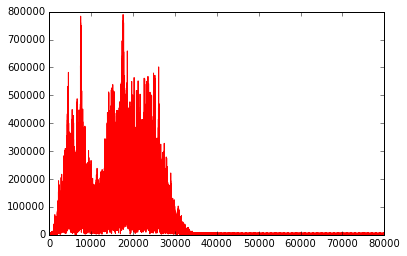

In [59]:
from scipy.fftpack import  fft

fourier_transform = fft(filtered_data) # take the fourier transform 
half_fourier = len(fourier_transform)/2  # you only need half of the fft list (real signal symmetry)

pyplot.plot(abs(fourier_transform[:(half_fourier-1)]), 'r') 
pyplot.show()

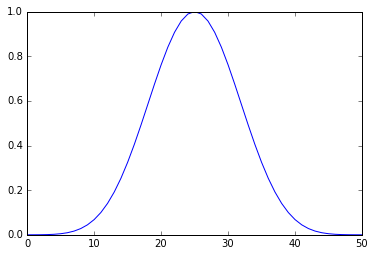

In [57]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt

window = signal.kaiser(51, beta=14)
pyplot.plot(window)